# Probability Density Function Analysis for Battleship

The intent is to describe the "attacker" in terms of how long it takes it to sink a number of ships. This is described in terms of a probability density function. Since there is a finite number of squares in the battleship grid (typically 100), it is reasonable to say that once all shots have been fired, all ships have been sunk with probability 1.

### The scenarios

A game of battleship is simulated with 1,2,3, and 17 ships, each one occupying 1 cell, or square. The attacker takes random shots at the 100-square board. If it is a HIT, the ship sinks. The game is won when the attacker sinks all the ships. 

The number of shots it took to win is then stored and a probability density function for the number of shots it takes to sink all ships is plotted. The game is played 10,000 times. 

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
#Utility functions
def getUnusedCoordinate(numCoords,usedCoordinates=[]):
    while True:
        coordinate = random.randint(1,numCoords)
        if coordinate not in usedCoordinates:
            return coordinate
        
        
def placeShips(numShips,numCoords):
    shipLocation = [0]*numShips
    
    for i in range(numShips):
        shipLocation[i] = getUnusedCoordinate(numCoords,shipLocation)
    return shipLocation

def playSimpleBattleshipAttacker(numGames,numCoordinates,numShips):
    experimentResult = np.empty(NUM_EPISODES)

    #Pick a random place to place the ships 
    shipsCoordinate = placeShips(NUM_SHIPS, NUM_COORDINATES)

    for curEpisodeIdx in range(NUM_EPISODES):

        shipsSunk = [False]*NUM_SHIPS
        keepShooting = True
        numShotsTaken = 0
        shotsTaken = list()

        #Fire randomly until ship is sunken. 
        while keepShooting:
            randomShotCoordinate = random.randint(1,NUM_COORDINATES)

            #If we have shot this before, try again. 
            if randomShotCoordinate in shotsTaken:
                continue
            else:
                shotsTaken.append(randomShotCoordinate)
                numShotsTaken += 1

                for curShip in range(NUM_SHIPS):
                    if shipsCoordinate[curShip] == randomShotCoordinate:
                        shipsSunk[curShip] = True

                if all(shipSunken==True for shipSunken in shipsSunk):
                    keepShooting = False
                    experimentResult[curEpisodeIdx]=numShotsTaken
    return experimentResult

### One-ship scenario

The mean is: 51.1415


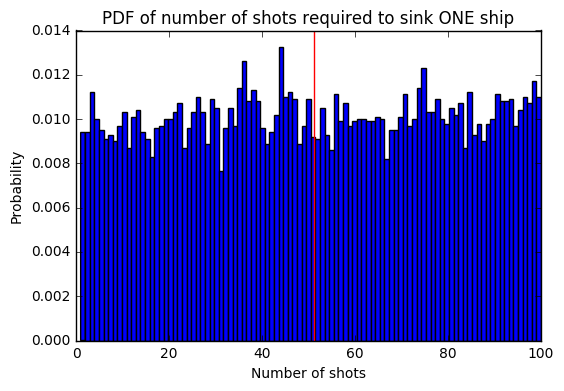

In [3]:
NUM_EPISODES = 10000
NUM_COORDINATES = 100
NUM_SHIPS = 1

experimentResult = playSimpleBattleshipAttacker(NUM_EPISODES,NUM_COORDINATES,NUM_SHIPS)

plt.hist(experimentResult,bins=NUM_COORDINATES,normed=True,range=(1,NUM_COORDINATES));
plt.title('PDF of number of shots required to sink ONE ship')
plt.xlabel('Number of shots')
plt.ylabel('Probability')

avgNumberOfShotsToWIn = experimentResult.mean()
plt.axvline(x=avgNumberOfShotsToWIn,color="red")

print("The mean is: " + str(avgNumberOfShotsToWIn))

#### Observations about the random-shot attacker. 

* The mean number of shots to sink one ship is 50. 
* All number of shots have almost equal probability of sinking the ship (1%). This makes perfect sense: the ship occupies 1 square and there are 100 of them. Because the ship is being placed randomly on the grid, the likelihood that there is a ship in any given square is 1/100 = 0.01 or 1%. This means that the probability density function for sinking a ship can be modeled as a uniform distribution (U(1,100)). 


### Two-ship scenario

The mean is: 67.3624


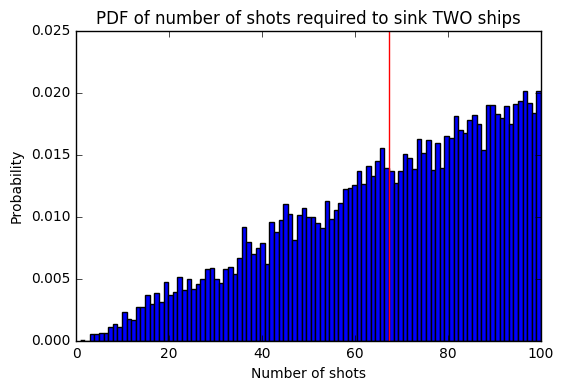

In [4]:
NUM_EPISODES = 10000
NUM_COORDINATES = 100
NUM_SHIPS = 2

experimentResult = playSimpleBattleshipAttacker(NUM_EPISODES,NUM_COORDINATES,NUM_SHIPS)

plt.hist(experimentResult,bins=NUM_COORDINATES,normed=True,range=(1,NUM_COORDINATES));
plt.title('PDF of number of shots required to sink TWO ships')
plt.xlabel('Number of shots')
plt.ylabel('Probability')

avgNumberOfShotsToWIn = experimentResult.mean()
plt.axvline(x=avgNumberOfShotsToWIn,color="red")

print("The mean is: " + str(avgNumberOfShotsToWIn))

The mean number of shots has gone up ~18%, from 50% to 68%, after adding another single-square ship. 

### Three-ship scenario

The mean is: 75.7009


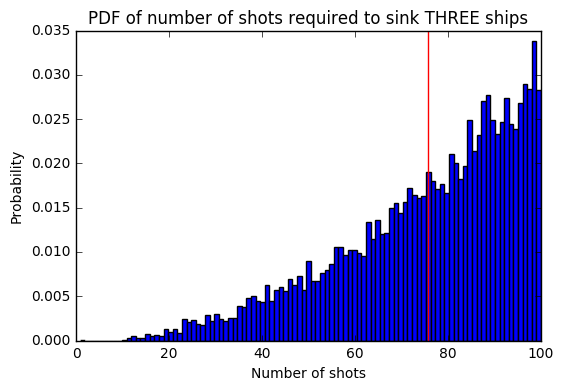

In [5]:
NUM_EPISODES = 10000
NUM_COORDINATES = 100
NUM_SHIPS = 3

experimentResult = playSimpleBattleshipAttacker(NUM_EPISODES,NUM_COORDINATES,NUM_SHIPS)

plt.hist(experimentResult,bins=NUM_COORDINATES,normed=True,range=(1,NUM_COORDINATES));
plt.title('PDF of number of shots required to sink THREE ships')
plt.xlabel('Number of shots')
plt.ylabel('Probability')

avgNumberOfShotsToWIn = experimentResult.mean()
plt.axvline(x=avgNumberOfShotsToWIn,color="red")

print("The mean is: " + str(avgNumberOfShotsToWIn))

Again, the mean number of shots has gone up from 68% to 75% when playing against 3 ships.

Last, let's simulate a true battleship scenario, where 17 squares in aggregate are occupied (the carrier takes 5 squares, the attacker 4, etc...)

The mean is: 95.4395


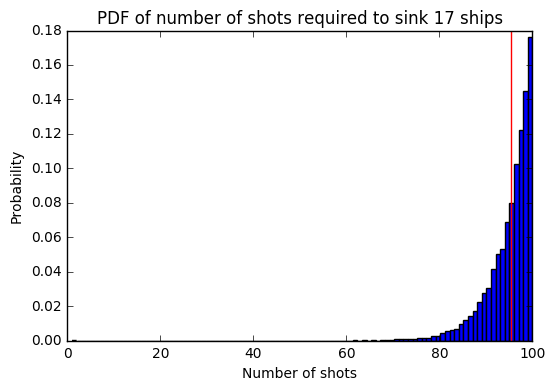

In [6]:
NUM_EPISODES = 10000
NUM_COORDINATES = 100

#when playing with random shots, have 17 ships occupying 1 
#square is the same as having multiple ships occupying 17 squares
#in total
NUM_SHIPS = 17

experimentResult = playSimpleBattleshipAttacker(NUM_EPISODES,NUM_COORDINATES,NUM_SHIPS)

fig = plt.hist(experimentResult,bins=NUM_COORDINATES,normed=True,range=(1,NUM_COORDINATES));
plt.title('PDF of number of shots required to sink 17 ships')
plt.xlabel('Number of shots')
plt.ylabel('Probability')

avgNumberOfShotsToWIn = experimentResult.mean()
plt.axvline(x=avgNumberOfShotsToWIn,color="red")

print("The mean is: " + str(avgNumberOfShotsToWIn))

Notice how, on average, it takes 95 shots to sink all the ships when playing with random shots. 